<a href="https://colab.research.google.com/github/EunKyung-o/BusanAIDeveloperCourse_AI_FinalProject/blob/main/Sugar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 / 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier

from IPython.display import Image
import warnings

from tensorflow.keras.layers import Dense, Activation, Embedding, LSTM, Flatten
from keras.models import Sequential
from keras.layers import Dense

In [2]:
sugar = pd.read_excel('/content/drive/My Drive/2020_AI_Busan_FinalGroup/suger_100.xls', header=None)
sugar

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180
0,2161.583258,2431.545787,2646.887341,2850.512879,3033.048520,3196.382733,3366.801902,3504.521619,3631.331760,3748.912845,3860.474402,3980.329288,4078.588463,4170.796299,4267.228097,4360.873611,4483.529042,4587.674883,4702.252561,4824.095156,4975.341576,5106.513297,5250.073729,5397.005675,5572.206017,5718.912088,5854.162354,5976.304229,6108.315815,6214.802884,6315.306296,6431.155146,6586.850236,6738.164678,6929.094522,7196.781347,7478.754918,7810.460402,8247.120449,8704.909436,...,1809.227773,1717.808298,1630.122497,1549.792992,1474.766666,1406.003739,1333.348626,1265.966205,1200.488119,1142.218219,1090.838092,1038.931085,994.287103,948.722827,900.032626,852.004489,804.919599,757.239037,711.800582,661.799671,619.354860,580.341530,546.841464,514.620909,489.081043,466.765738,446.896184,431.462324,419.894965,407.823730,397.770466,386.995699,379.311286,375.401366,371.273211,367.988427,364.429397,361.698957,360.099676,11.5
1,1071.432162,1202.209045,1307.525827,1412.795380,1515.898688,1606.249178,1703.706785,1784.289264,1856.500292,1926.699309,1992.435215,2072.658333,2143.515404,2211.704104,2284.448038,2357.009099,2444.132249,2528.026652,2616.150663,2708.367431,2822.418117,2921.377090,3016.688176,3121.429594,3238.444870,3338.747287,3437.460320,3526.285442,3607.429280,3685.940210,3748.010801,3822.430756,3917.669037,4026.906608,4146.898538,4335.620902,4539.092701,4783.722905,5141.441018,5515.026054,...,1282.133248,1221.349735,1162.862143,1106.210239,1055.038347,1007.618099,960.375898,916.865275,880.662188,844.006182,809.247754,777.679744,746.462618,718.686017,689.627535,659.300292,630.574209,601.211552,573.767367,543.266164,521.075499,499.482918,479.626226,463.002315,446.375631,432.862315,419.159683,411.679375,405.437030,397.086307,391.577493,383.790210,378.981062,374.520664,370.776845,366.963734,364.886968,363.671573,360.055994,12.1
2,1128.226171,1259.923218,1373.929003,1479.013753,1577.540433,1669.218776,1770.547304,1850.429199,1924.618300,1995.737327,2062.193425,2137.454372,2200.719446,2267.057689,2326.272423,2391.054318,2474.148763,2548.213301,2624.214326,2712.329544,2818.187877,2911.475699,3016.572921,3128.383175,3258.071506,3364.917499,3483.332167,3597.584106,3730.650359,3849.822766,3976.177064,4101.902330,4251.044990,4388.356887,4545.038270,4738.363337,4926.136364,5128.193684,5380.155413,5626.861392,...,1123.879062,1074.634106,1026.412600,982.308391,941.048465,900.214206,861.502930,825.062119,789.304202,758.414726,729.231490,700.483804,674.046805,650.779872,629.155442,606.962160,585.024597,561.830064,535.745907,511.492186,490.292436,472.033206,455.562765,442.573982,431.336577,419.335653,410.887872,403.392658,394.731467,388.512596,382.750932,377.101660,372.305184,369.147493,366.238638,363.465644,360.944813,357.990438,354.534681,10.7
3,433.931413,461.125613,482.242186,502.325051,520.445529,539.593950,556.609712,574.213136,589.034544,603.412333,618.960747,639.552351,656.233891,672.800245,692.332608,708.985118,727.668718,747.082603,768.838021,789.440848,818.278494,843.010470,868.022925,895.141161,922.343529,948.280376,971.949831,996.601399,1019.803729,1039.617313,1060.664322,1080.108302,1104.442041,1135.525874,1173.336748,1228.169594,1294.597446,1379.900930,1493.013899,1621.732871,...,851.379464,819.239094,785.825693,754.195698,727.182021,698.463677,672.513890,646.454164,624.423908,603.489841,585.071465,568.982864,551.786218,536.155057,519.861581,504.471755,487.894677,471.266692,455.996081,440.079843,427.185765,415.532164,405.765153,397.583778,390.428516,384.272280,377.964427,373.799831,368.365402,364.089692,359.111570,354.985574,350.242654,347.396828,343.219645,339.703369,338.849383,337.589200,337.167007,12.1
4,730.375746,800.591047,859.404657,918.243295,970.92

# 머신러닝

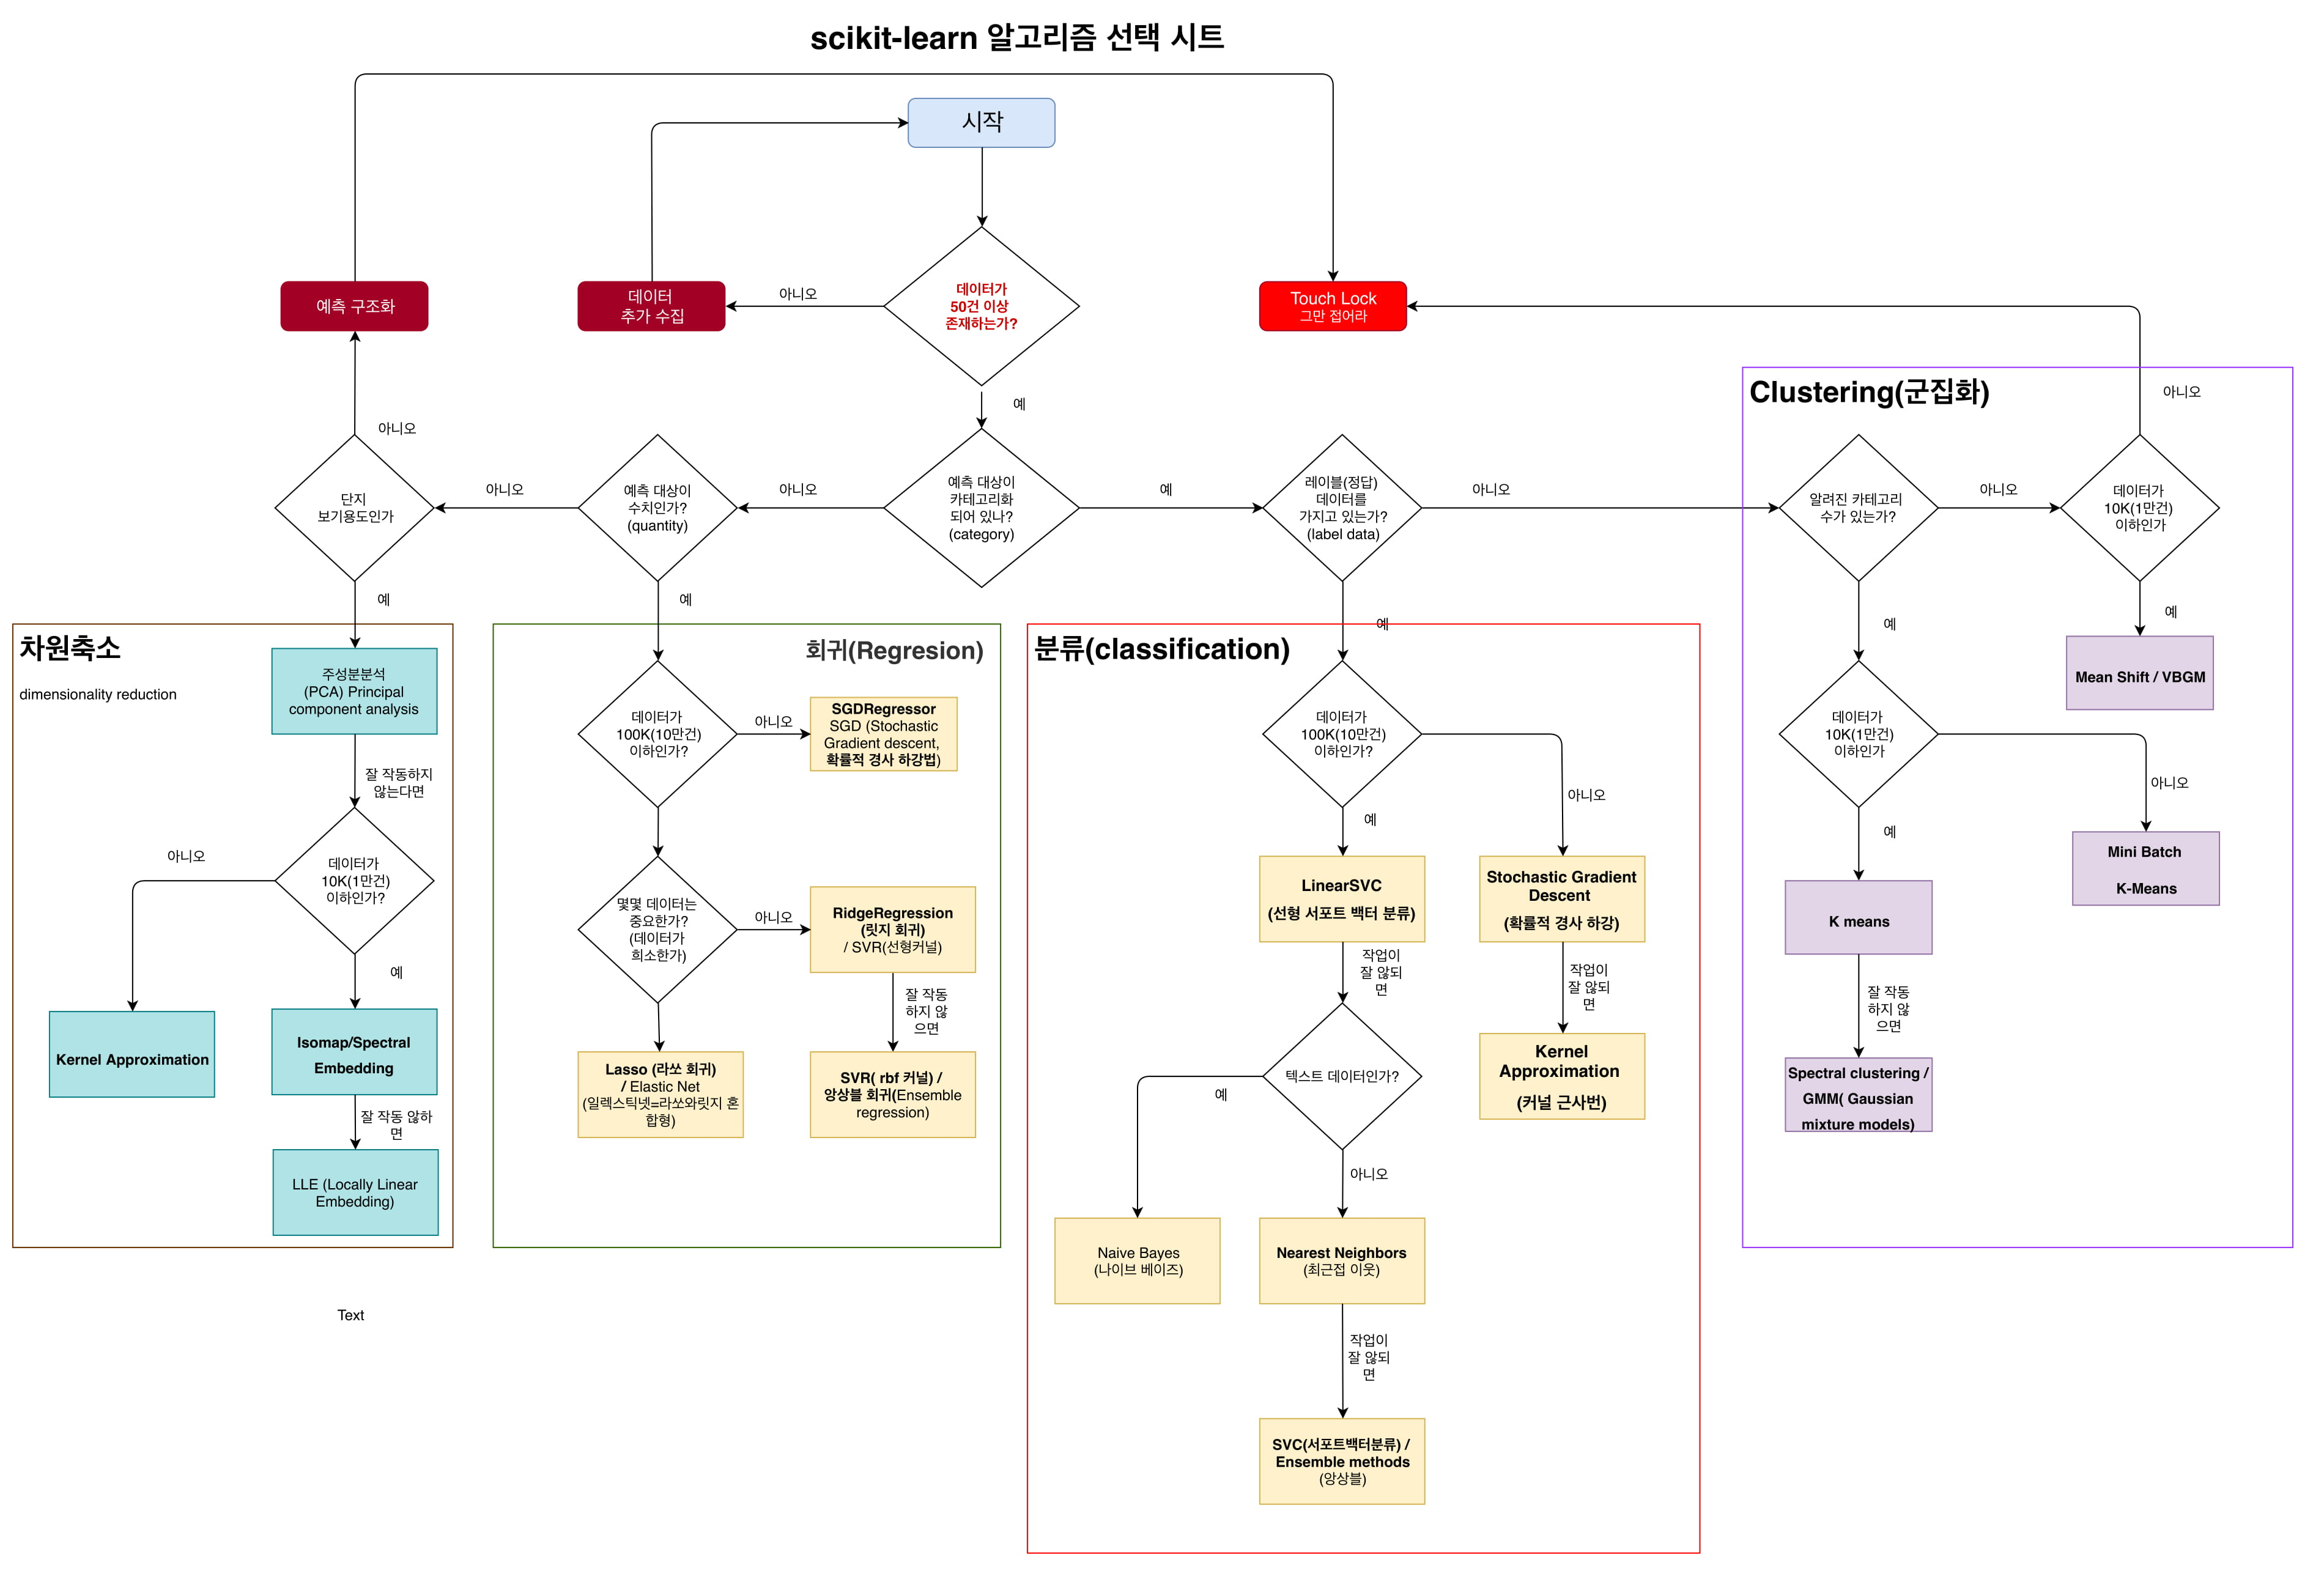

In [3]:
Image('/content/drive/My Drive/2020_AI_Busan/3_MachineLearning/etc/Machin learning-1.jpg')
# 회귀 카테고리에서 릿지 회귀, SVR(선형 커널), SVR(rbf 커널), 앙상블 회귀 쓰는 것이 적합해보임

## SVR

In [4]:
# 1. X
X = list()
for idx in range(0, sugar.shape[0]): 
  X.append(sugar.iloc[idx, :-1].values)
X = np.array(X)

# 2. y
y = sugar[180].values

# 3. train / test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0 )

# 4. shape 확인
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 180), (100,), (80, 180), (20, 180), (80,), (20,))

In [5]:
params = {
    'kernel'  : ['linear', 'rbf'],
    'C'       : [0.01, 0.1, 1, 10, 100],
    'epsilon' : [0.001, 0.01, 0.1, 1, 10]
}

grid_cv = GridSearchCV(SVR(), param_grid=params, cv=3, verbose=True)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_, grid_cv.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'} 0.09467620204170595


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 20.4min finished


In [6]:
model = SVR(kernel='rbf', C=10, epsilon=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_test)

df_error = pd.DataFrame(index=range(0,20))
df_error['real']  = y_test
df_error['pred']  = pred
df_error['pred']  = df_error['pred'].round(1)
df_error['error'] = abs(df_error['real'] - df_error['pred'])
df_error

,real,pred,error
0,12.6,12.1,0.5
1,12.5,12.0,0.5
2,10.7,12.7,2.0
3,12.5,12.5,0.0
4,12.5,11.4,1.1
5,11.0,11.5,0.5
6,11.3,11.8,0.5
7,12.3,11.6,0.7
8,12.3,12.4,0.1
9,13.3,12.9,0.4


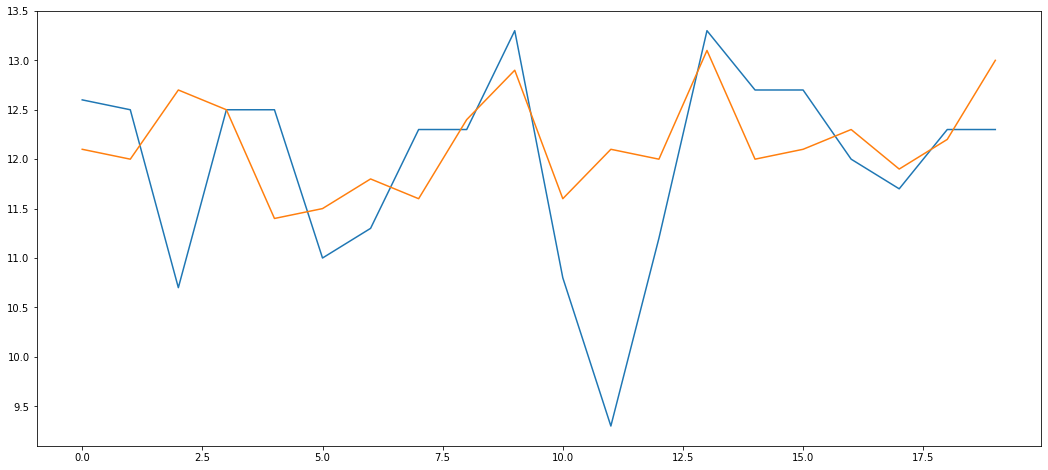

In [7]:
plt.figure(figsize=(18,8))
plt.plot(df_error['real'])
plt.plot(df_error['pred'])
plt.show()

## Random Forest Regression

In [8]:
warnings.filterwarnings("ignore")
params = {
    'n_estimators' : [1,10,100,1000,10000],
    'max_depth'    : [None,1,10,100],
    'max_features' : [None, 'auto', 'log2']
}

grid_cv = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=True)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_, grid_cv.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 1, 'max_features': 'log2', 'n_estimators': 100} -0.026149560749303878


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 25.7min finished


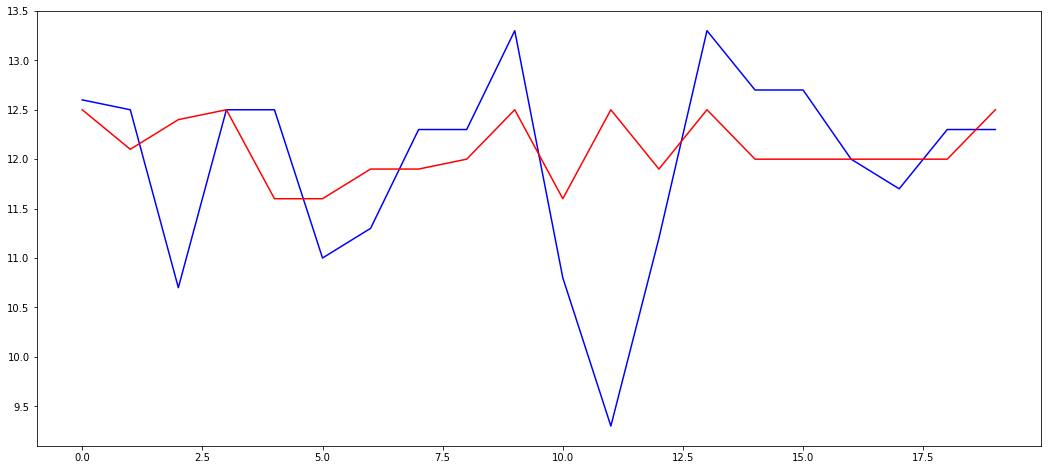

In [9]:
model = RandomForestRegressor(max_depth= 1, max_features= 'log2', n_estimators= 10000)

model.fit(X_train, y_train)
pred = model.predict(X_test)

df_error = pd.DataFrame(index=range(0,20))
df_error['real']  = y_test
df_error['pred']  = pred
df_error['pred']  = df_error['pred'].round(1)
df_error['error'] = abs(df_error['real'] - df_error['pred'])

plt.figure(figsize=(18,8))
plt.plot(df_error['real'], 'b')
plt.plot(df_error['pred'], 'r')
plt.show()

# 머신러닝 참고 코드
- [참고 블로그](https://todayisbetterthanyesterday.tistory.com/50)

- 선형회귀모델

In [10]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

sm_train_x = sm.add_constant(X_train, has_constant = "add")    # b0 상수항 추가 
sm_model = sm.OLS(y_train,sm_train_x)                          # OLS 모델
fitted_sm_model = sm_model.fit()                               # 적합 
fitted_sm_model.summary()

sm_test_x = sm.add_constant(X_test, has_constant="add")        # 예측을 위한 test 상수항 추가
sm_model_predict = fitted_sm_model.predict(sm_test_x)          # 예측

sqrt(mean_squared_error(sm_model_predict, y_test))             # RMSE 계산

1.3783002305083953

- 선형회귀모델 Bagging

In [11]:
regression_model = LinearRegression()                                   # 선형 회귀 모형
linear_model1 = regression_model.fit(X_train, y_train)                  # 학습 데이터를 선형 회귀 모형에 적합
predict1 = linear_model1.predict(X_test)                                # 학습된 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict1, y_test))))    # RMSE 결과

RMSE: 1.3841738796224583


In [12]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(base_estimator = regression_model,     # 선형회귀모형
                                 n_estimators = 5,                      # 5개의 샘플링
                                 verbose = 1)                           # 학습 과정 표시
linear_model2 = bagging_model.fit(X_train, y_train)                     # 학습 진행
predict2 = linear_model2.predict(X_test)                                # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict2, y_test))))    # RMSE 결과

RMSE: 1.298055564087463


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


- Sampling 개수 증가

In [13]:
bagging_model2 = BaggingRegressor(base_estimator = regression_model,    # 선형 회귀모형
                                  n_estimators = 30,                    # 30개의 샘플링
                                  verbose = 1)                          # 학습 과정 표시
linear_model3 = bagging_model2.fit(X_train, y_train)                    # 학습 진행
predict3 = linear_model3.predict(X_test)                                # 학습된 Bagging 선형 회귀 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict3, y_test))))    # RMSE 결과

RMSE: 0.9762556974801748


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


- 의사결정나무 Bagging

In [14]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()                           # 의사결정나무 모형
tree_model1 = decision_tree_model.fit(X_train, y_train)                 # 학습 데이터를 의사결정나무 모형에 적합
predict1 = tree_model1.predict(X_test)                                  # 학습된 의사결정나무 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict1, y_test))))    # RMSE 결과

RMSE: 1.1280514172678477


In [15]:
bagging_decision_tree_model1 = BaggingRegressor(base_estimator = decision_tree_model,    # 의사결정나무 모형
                                                n_estimators = 5,                        # 5번 샘플링
                                                verbose = 1)                             # 학습 과정 표시
tree_model2 = bagging_decision_tree_model1.fit(X_train, y_train)                         # 학습 진행
predict2 = tree_model2.predict(X_test)                                                   # 학습된 Bagging 의사결정나무 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict2, y_test))))                     # RMSE 결과

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 1.0881727803984076


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [16]:
bagging_decision_tree_model1 = BaggingRegressor(base_estimator = decision_tree_model,    # 의사결정나무 모형
                                                n_estimators = 30,                       # 30번 샘플링
                                                verbose = 1)                             # 학습 과정 표시
tree_model2 = bagging_decision_tree_model1.fit(X_train, y_train)                         # 학습 진행
predict2 = tree_model2.predict(X_test)                                                   # 학습된 Bagging 의사결정나무 모형으로 평가 데이터 예측
print("RMSE: {}".format(sqrt(mean_squared_error(predict2, y_test))))                     # RMSE 결과

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 1.0686031900466033


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


# 딥러닝

## 데이터셋 만들기

In [8]:
x = np.zeros((100,180))
for idx in range(0, sugar.shape[0]) : 
  x[idx] = sugar.iloc[idx, :-1].values

y = sugar.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1 )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((80, 180), (80,), (20, 180), (20,))

## LSTM

In [12]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

model = Sequential()
model.add(LSTM(7, input_shape = (x_train.shape[1], 1), activation ='relu'))
model.add(Dense(4))
model.add(Dense(1))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(x_train, y_train, epochs=1000, batch_size=1, verbose=1)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=1)
print(loss_and_metrics)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
80/80 [==============================] - 9s 118ms/step - loss: 142.1146 - mse: 142.1146
Epoch 2/1000
80/80 [==============================] - 9s 113ms/step - loss: 135.1053 - mse: 135.1053
Epoch 3/1000
80/80 [==============================] - 9s 113ms/step - loss: 125.6965 - mse: 125.6965
Epoch 4/1000
80/80 [==============================] - 9s 115ms/step - loss: 114.236

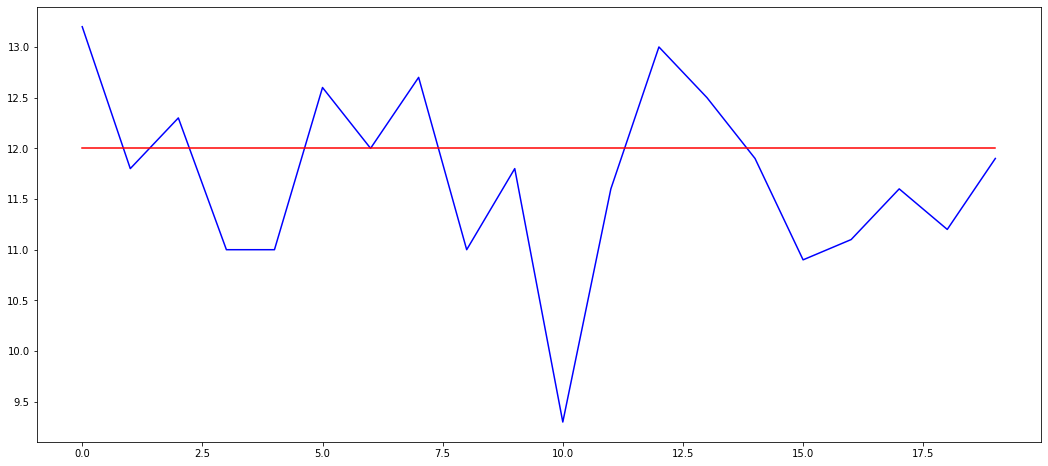

In [13]:
pred = model.predict(x_test)

df_error = pd.DataFrame(index=range(0,20))
df_error['real']  = y_test
df_error['pred']  = pred
df_error['pred']  = df_error['pred'].round(1)
df_error['error'] = abs(df_error['real'] - df_error['pred'])

plt.figure(figsize=(18,8))
plt.plot(df_error['real'], 'b')
plt.plot(df_error['pred'], 'r')
plt.show()